<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**그레디언트 그리기**

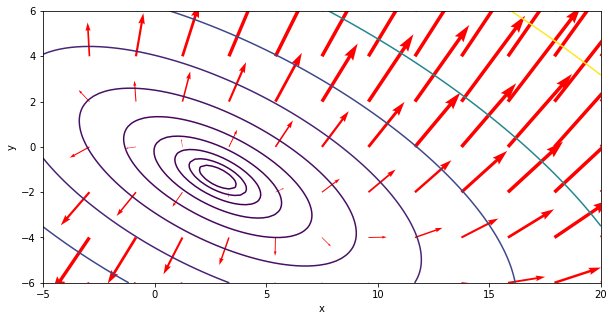

In [ ]:
import numpy as np#벡터 및 행렬 연산
import matplotlib.pyplot as plt#그래프로 시각화

def f(x,y):#f(x)설정
  return 2*x**2 +4*x*y +5*y**2 -6*x +2*y + 10
def dx(x,y):#f(x)를 x에 대해 미분
  return 4*x + 4*y -6
def dy(x,y):#f(x)를 y에 대해 미분
  return 4*x + 10*y +2

xi=np.linspace(-5,20,100)#xi=-5부터 20까지 100개의 샘플 생성
yi=np.linspace(-6,6,100)#yi=-6부터 6까지 100개의 샘플 생성
X,Y=np.meshgrid(xi,yi)#xi,yi로 2차원 그리드
Z=f(X,Y)

xj=np.linspace(-5,20,13)#xj=-5부터 20까지 100개의 샘플 생성
yj=np.linspace(-6,6,7)#yj=-6부터 6까지 7개의 샘플 생성
X1,Y1=np.meshgrid(xj,yj)#xj,yj 2차원 그리드
Dx=dx(X1,Y1)
Dy=dy(X1,Y1)

plt.figure(figsize=(10,5))#가로:10,세로:5 크기설정
plt.contour(X,Y,Z,levels=np.logspace(0,3,10))#level수(0부터 3까지 10개의 배열멤버수)에 맞게 등치선 표현
plt.quiver(X1,Y1,Dx,Dy,color='red',scale=500,minshaft=4)#(X1,Y1):화살표 위치,(Dx,Dy)화살표 방향,색상:빨강,화살표 길이 단위당 데이터 단위 수:200,화살표가 스케일링되는 길이 아래의 머리 길이 단위:4인 그레디언트 표현
plt.xlabel('x')#x축 라벨 설정
plt.ylabel('y')#y축 라벨 설정
plt.show()#그래프 표현

**MLP학습**

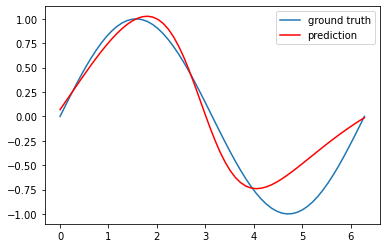

In [ ]:
import numpy as np#벡터 및 행렬 연산
import matplotlib.pyplot as plt#그래프로 시각화

class MLP:
  def __init__(self,hidden_node=3):#은닉층 3개
    self.input_node=1;self.hidden_node=hidden_node; self.output_node=1   # 입력, 은닉, 출력 게층의 노드 개수 설정
    self.w1=np.random.rand(self.hidden_node,self.input_node)#input -> hidden 가중치
    self.b1=np.random.rand(self.hidden_node,1)#input -> hidden 가중치
    self.w2=np.random.rand(self.output_node,self.hidden_node)#hidden -> output가중치
    self.b2=np.random.rand(self.output_node,1)#hidden -> output가중치

  def sigmoid(self,x):#0또는 1을 출력하기 위한 sigmoid함수
    return 1/(1+np.exp(-x))
  def d_sigmoid(self,x):#backpropration에 사용될 sigmoid함수
    return self.sigmoid(x)*(1-self.sigmoid(x))
  def train(self,train_x,train_y,alpha=0.1,max_iter=500):#오차역전파를 이용하여 가중치
    np.random.seed(0)
    input_node=self.input_node;hidden_node=self.hidden_node# 입력, 은닉 설정
    output_node=self.output_node;alpha=alpha;max_iter=max_iter
    for iter in range(1,max_iter):
      for i in range(n_train):
        z1=np.dot(self.w1,train_x[i].reshape(1,1))+self.b1; a1=self.sigmoid(z1);#은닉층의z1,a1을 계산
        z2=np.dot(self.w2,a1)+self.b2;y_hat=z2; y_hat_list[i]=y_hat#출력층의 값 계산
        e=0.5*(train_y[i]-y_hat)**2;dy=-(train_y[i]-y_hat)#손실함수 계산
        dz2=1;dw2=a1.T
        delta_w2=dy*dz2*dw2; delta_b2=dy*dz2;#hidden -> output가중치
        da1=self.w2.T; dz1=self.d_sigmoid(z1); dw1=train_x[i].T
        delta_w1=dy*dz2*da1*dz1*dw1; delta_b1=dy*dz2*da1*dz1;
        self.w2-=alpha*delta_w2; self.b2 -= alpha*delta_b2#hidden -> output가중치 재조정
        self.w1-=alpha*delta_w1; self.b1 -= alpha*delta_b1#input -> hidden가중치 재조정

  def predict(self,test_x): #입력데이터에 대해 미래값 예측
    for i in range(n_test):
      z1=np.dot(self.w1,test_x[i].reshape(1,1))+self.b1#가중치와 입력값 곱함
      a1=self.sigmoid(z1)#sigmoid함수를 통해 0,1로 표현
      z2=np.dot(self.w2,a1)+self.b2#앞의 계산 결과를 다시 가중치와 곱함
      y_hat=z2#출력값 
      y_hat_list[i]=y_hat#출력값 배열에 입력
    return y_hat_list#출력 값 배열 리턴

n_train=20#학습데이터 수 설정
train_x=np.linspace(0,np.pi*2,n_train)#0부터 np.pi*2까지 학습데이터 개수의 샘플 생성
train_y=np.sin(train_x)

n_test=60#테스트데이터 수 설정
test_x=np.linspace(0,np.pi*2,n_test)#0부터 np.pi*2까지 테스트데이터 개수의 샘플 생성
test_y=np.sin(test_x)
y_hat_list=np.zeros(n_test)

mlp=MLP(hidden_node=4)#은닉층 4개로 설정
mlp.train(train_x,train_y,max_iter=600)#학습테이터로 최대 600번 학습
plt.plot(test_x,test_y,label='ground truth')#'ground truth'라벨의 그래프로 그림

y_hat_list=mlp.predict(test_x)#예측출력값
plt.plot(test_x,y_hat_list,'-r',label='prediction')#'prediction'라벨의 그래프로 그림
plt.legend()
plt.show()#그래프 표현
    

**sklearn MLP**

In [ ]:
import pandas as pd#데이터 분석 위함
from sklearn.datasets import load_wine#wine데이터 
from sklearn.model_selection import train_test_split#학습데이터 테스트데이터 분류
from sklearn.preprocessing import StandardScaler#전처리 스케일 조정
from sklearn.neural_network import MLPClassifier#다층 신경망
from sklearn.metrics import classification_report,confusion_matrix#분류성능평가

wine=load_wine()#wine데이터 불러옴
data=pd.DataFrame(data=wine['data'],columns=wine['feature_names'])#행과 열 설정
print(data.head())#데이터 출력

X=wine.data#와인데이터
y=wine.target#목표데이터
X_train,X_test,y_train,y_test=train_test_split(X,y)#학습데이터와 테스트데이터 나눔

scaler=StandardScaler()#전처리 스케일 조정
scaler.fit(X_train)#학습데이터 데이터 변환학습
StandardScaler(copy=True,with_mean=True,with_std=True)#평균0 분산 1로 편경

X_train=scaler.transform(X_train)#학습데이터 스케일 조정
X_test=scaler.transform(X_test)#테스트데이터 스케일 조정

mlp=MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)#13개의 뉴런을 가진 3개의은닉층,최대=500 으로 분류 성능평가
mlp.fit(X_train,y_train)#학습데이터 데이터 변환학습
predictions=mlp.predict(X_test)#테스트 데이터로 예측
print(confusion_matrix(y_test,predictions))#y테스트데이터와 예측값 혼돈행렬로 출력
print(classification_report(y_test,predictions))#y테스트데이터와 예측값 분류 결과 출력

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
[[13  0  0]
 [ 0 16  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        17
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



**출력값 인코딩**

In [ ]:
from numpy import array#배열 생성
from numpy import argmax#최대값
from sklearn.preprocessing import LabelEncoder#LabelEncoder사용
from sklearn.preprocessing import OneHotEncoder#onehotencoder사용

data=['cold','cold','warm','cold','hot','hot','warm','cold','warm','hot']#데이터 배열 설정
values=array(data)#배열로 생성

label_encoder=LabelEncoder()#문자를 정수로 바꿔줌
integer_encoded=label_encoder.fit_transform(values)#label_encoder값 스케일 조정
print('\n정수 인코딩\n',integer_encoded)#인코딩 된 값 출력

onehot_encoder=OneHotEncoder(sparse=False)#onehot_encoder설정
integer_encoded=integer_encoded.reshape(len(integer_encoded),1)#integer_encoded길이로 재배열
onehot_encoded=onehot_encoder.fit_transform(integer_encoded)#integer_encoded를 OneHotEncoder로 표현
print('\none-hot 인코딩 \n',onehot_encoded)#one-hot 인코딩결과 출력

inverted=label_encoder.inverse_transform([argmax(onehot_encoded[0,:])])#onehot_encoded첫번째 값 문자로 역변환
print('\n',onehot_encoded[0],'=>',inverted)#역변환 결과 출력


정수 인코딩
 [0 0 2 0 1 1 2 0 2 1]

one-hot 인코딩 
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

 [1. 0. 0.] => ['cold']


**RBF망 학습**

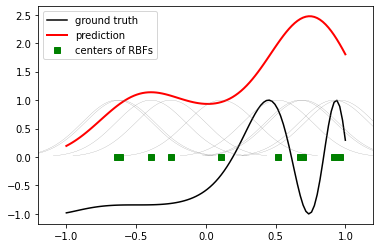

In [ ]:
from scipy import *#과학 분석 알고리즘
from scipy.linalg import norm,pinv
from matplotlib import pyplot as plt#그래프 시각화
import numpy as np#배열 생성

class RBF:
  def __init__(self,indim,numCenters,outdim):
    self.indim=indim; self.outdim=outdim; self.numCenters=numCenters#초기값 설정
    self.centers=[random.uniform(-1,1,indim)for i in range(numCenters)]#중심값 랜덤으로 설정
    self.beta=8#은닉층 값
    self.W=random.random((self.numCenters,self.outdim))#가중치값 랜덤 설정
  def basisFunc(self,c,d):
    assert len(d)==self.indim
    return np.exp(-self.beta*norm(c-d)**2)#예측 은닉층 출력값 계산
  def activationFunc(self,X):#RBF활성화 계산
    G=np.zeros((X.shape[0],self.numCenters),float)
    for ci,c in enumerate(self.centers):
      for xi, x in enumerate(X):
        G[xi,ci]=self.basisFunc(c,x)
    return G

  def train(self,X,Y):#가중치 학습
    rnd_idx=random.permutation(X.shape[0])[:self.numCenters]## 훈련 세트에서 랜덤 중심 벡터 선택
    self.centers=[X[i,:]for i in rnd_idx]#중심값 설정
    G=self.activationFunc(X)#RBF활성화 계산
  def predict(self,X):#출력 계산
    G=self.activationFunc(X)#RBF활성화 계산
    Y=np.dot(G,self.W)#G과 self.W배열 곱
    return Y

n=100
x=mgrid[-1:1:complex(0,n)].reshape(n,1)# 설정 및 무작위 노이즈 추가
y=np.sin(3*(x+0.5)**3-1)#무작위 임의매핑

rbf=RBF(1,10,1)
rbf.train(x,y)#x,y값 학습
z=rbf.predict(x)#예측값 설정

plt.figure(figsize=(6,4))#가로:6,세로:4사이즈 설정
plt.plot(x,y,'k-',label='ground truth')#'ground truth'라벨의 그래프 표현
plt.plot(x,z,'r-',linewidth=2,label='prediction')#'prediction'라벨의 그래프 표현
plt.plot(rbf.centers,np.zeros(rbf.numCenters),'gs',label='centers of RBFs')#'centers of RBFs'라벨의 그래프 표현

for c in rbf.centers:
  cx=np.arange(c-0.7,c+0.7,0.01)#예측 x값
  cy=[rbf.basisFunc(np.array([cx_]),np.array([c]))for cx_ in cx]#예측 y값
  plt.plot(cx,cy,'-',color='gray',linewidth=0.2)#회색의 굵기0.2 넓이의 예측값 그래프 표현
plt.xlim(-1.2,1.2)#x축 범위 설정
plt.legend()
plt.show()#그래프 출력